In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_theme(context='notebook', style='white', font_scale=1.33)

In [4]:
stan_models = ['mb_m1','mb_m2a', 'mb_m2b', 'mb_m3']
sessions = [1,2,3]

data = []
for stan_model in stan_models:
    
    for session in sessions:

        df = read_csv(os.path.join('stan_results','mb',f'{stan_model}_s{session}_ppc.tsv'), sep='\t')
        df['model'] = stan_model
        data.append(df)
        
data = concat(data)

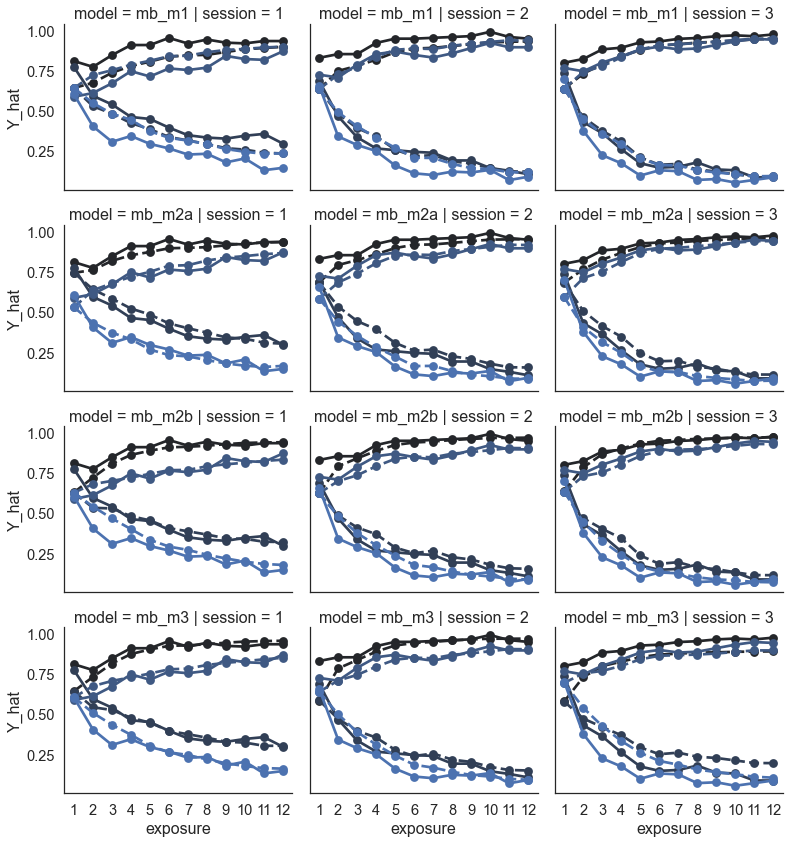

In [6]:
## Initialize canvas.
g = sns.FacetGrid(data, row='model', row_order=stan_models, col='session', col_order=sessions, aspect=1.25)
order = np.arange(12) + 1
hue_order = ['GW','NGW','GAL','NGAL']

g.map(sns.pointplot, 'exposure', 'choice', 'robot', order=order, hue_order=hue_order, ci=None)
g.map(sns.pointplot, 'exposure', 'Y_hat', 'robot', order=order, hue_order=hue_order, ci=None, linestyles='--')

In [7]:
agg = {'choice':'mean', 'Y_hat':'mean'}
gb = data.groupby(['model','session','subject','robot']).agg(agg).reset_index()

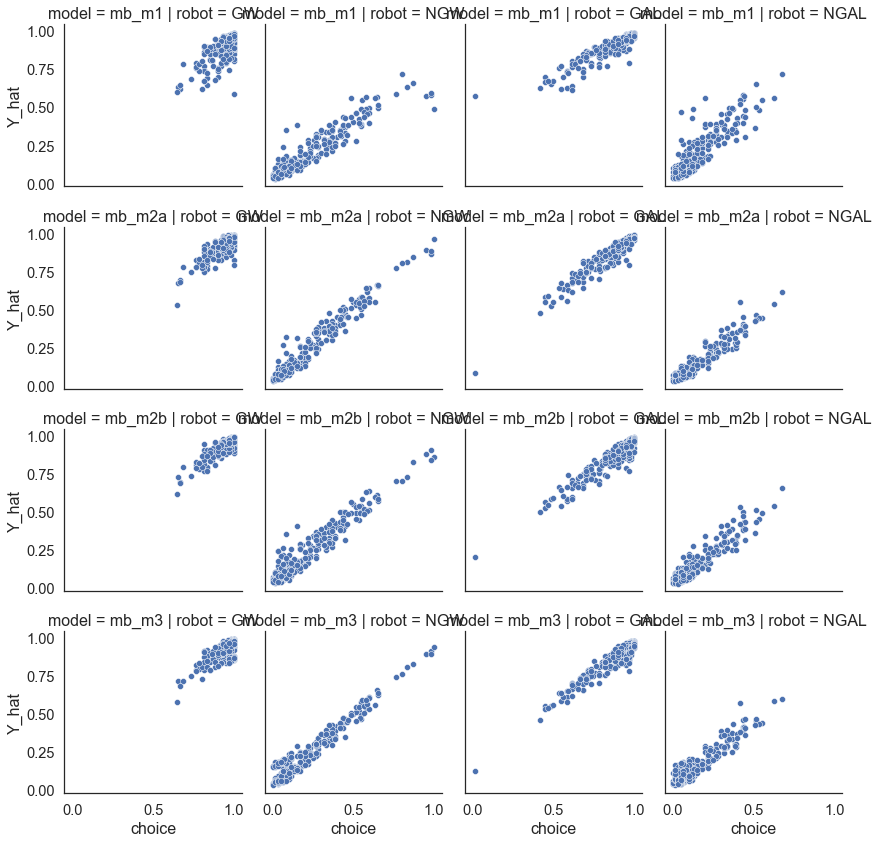

In [8]:
g = sns.FacetGrid(gb, row='model', row_order=stan_models, col='robot', col_order=['GW','NGW','GAL','NGAL'], )
g.map(sns.scatterplot, 'choice', 'Y_hat')

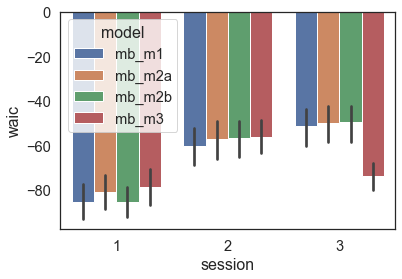

In [10]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='session', y='waic', hue='model', data=gb)
# ax.set(ylim=(-130,-100))

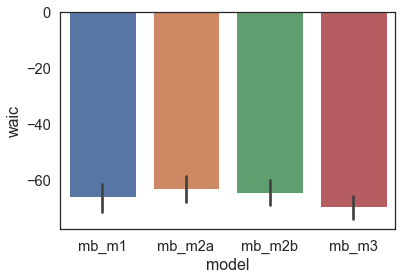

In [12]:
gb = data.groupby(['model','session','subject']).waic.sum().reset_index()

ax = sns.barplot(x='model', y='waic',data=gb)
# ax.set(ylim=(-130,-100))

In [13]:
df = read_csv('stan_results/mb/mb_m3_s3.tsv.gz', sep='\t', compression='gzip')

<AxesSubplot:xlabel='mu_pr[2]', ylabel='Count'>

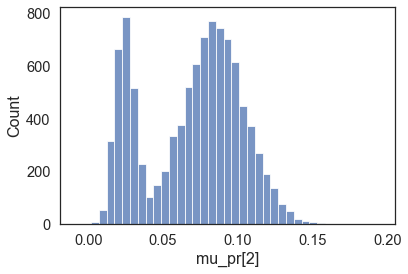

In [16]:
sns.histplot(df['mu_pr[2]'])

<AxesSubplot:xlabel='mu_pr[1]', ylabel='mu_pr[4]'>

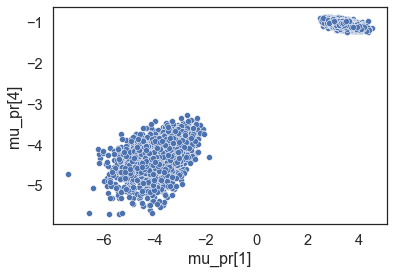

In [21]:
sns.scatterplot(x='mu_pr[1]', y='mu_pr[4]', data=df)